# Face Recognition
Face recognition is machine learning application, in which machine learns to identify the human face in the image. 
As we know machine learning model need a lots of data, on which we need to train it. Hence to identify a human face in the image we will need lots of pictures with human faces and pictures without human faces. It requires lot time to train this type of model, hence we will use the already trained model, which is very accurate in detecting the faces. Hence we are going to use Face_Recognition package to identification of faces.

## Objectives
To create a Face Recognition System we will need to achieve following objectives:
### 1. Requirement Analysis
In this step we need to list out the all required packages and tool for development of the system.
### 2. Feature Extraction 
A image cantain lot of noisy data, so we need to remove those unnecessary data and need to extract the features which will be useful for detecting the faces.
### 3. Face Detection
To recognise the face in a picture we first need to check that is there any human face in the picture or not. and if the human face is in the picture then we need to locate the face in the picture.
### 4. Face Recognition
now, as we located the face in the picture we need to recognize that face. for that we need a database with persone names and there pictures. we will compare the face in the inputed picture and the face in the picture got from database. 

## Requirement Analysis
As our whole project is going to be in python so we will need some python packages.
1. os - We will need the os library to access the device folders. 
2. OpenCV - To do operations on the picture
3. Face_Recognition - For face detection and Recogition
4. Matplotlib - To display the pictures
5. skimage - to do feature extraction related tasks.


We will import these libraries differently for each step, so that we can understand which library we will need for which task.

In [3]:
!pip install opencv-python

     |████████████████████████████████| 49.3 MB 3.2 MB/s eta 0:00:01


In [7]:
!pip install cmake

     |████████████████████████████████| 18.2 MB 2.0 MB/s eta 0:00:01


In [1]:
!pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached dlib-19.21.0.tar.gz (3.2 MB)
  Created wheel for dlib: filename=dlib-19.21.0-cp37-cp37m-linux_x86_64.whl size=4102099 sha256=aa7dd6d7e02cf32ef811ac8fde8f0bc9d77d20691b1e7faa53abb43485d81580
  Stored in directory: /home/hrik/.cache/pip/wheels/d8/8f/ac/70af71fd636fb03b238ca3f183e64f5dfdb5e4ffffeff89ce6
Successfully built dlib


## Feature Extraction
So from here we are going to start image processing. First of all we need a picture on which we will perform feature extraction. So now lets import a image from our device

/home/hrik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


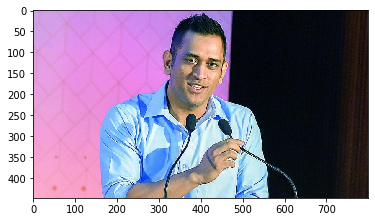

In [1]:
# we will import the required libraries
import matplotlib.pyplot as plt #for ploting of image
from skimage.feature import hog # for extraction HOG features of image.
from skimage import data, exposure
import cv2 # for preprocessing on image

# Now we will read image from the disk
image = cv2.imread('Pictures/dhoni.jpeg')
# When we read image using OpenCV, it reads the image in BGR format
# So now we will convert the image into RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

# Now we will show the image
plt.imshow(image)

This is our input image, on which we are going to perform the feature extraction

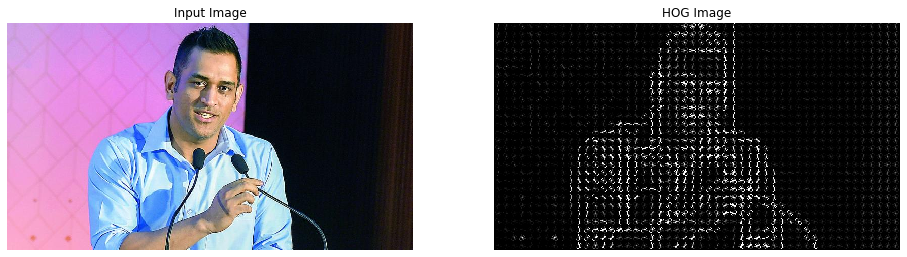

In [2]:
# now lets perform the feature extraction.
# we are going to use the hog function from skimage to extrat the HOG(Histogram of Oriented Gradient) image from input image.

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                   cells_per_block=(1,1), visualize=True, multichannel=True)
# fd is feature discriptor which is used for representation of image
# hog_image is a HOG image extracted from input image

# now let's plot input image and hog image both so it's easy to compare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), sharex = True, sharey = True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_rescaled_img = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_rescaled_img, cmap=plt.cm.gray)
ax2.set_title('HOG Image')
plt.show()

As we can see HOG image removes all unwanted data from the picture and showcases only the important features.

## Face Detection 
As till now we extracted the important features from the image, We need to detect that is there any faces in the image or not. If yes, then how many faces are there. 
For this we are going to use, already trained model, so that we can save our time.
For this operation we are going to use the Face Recognition library which we installed earlier. It is already trained model so with the use of some function we can detect the faces in the image.

In [3]:
# Let us import the important libraries for Face Detection purpose
import face_recognition # For Face Detection
from matplotlib.patches import Rectangle # To draw rectangles
import numpy as np # for mathematicle operations

# In Face Recognition library there is a function face_locations which detects the all faces in the image and 
# returns there locations
# let's use the function and detect the faces
face_locations = face_recognition.face_locations(image)

total_faces = len(face_locations)
# lets print out the number of faces in the image.
print('There are {} face(s) in the image'.format(total_faces))


There are 1 face(s) in the image


So till now, we are able to detect the faces in the image. Now let's create a function, using which we can draw the rectangles over the faces in the picture.

In [16]:
def detect_the_faces(image_path):
    image = cv2.imread(image_path) # Read the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert BGR to RGB format
    plt.imshow(image)
    ax = plt.gca()
    #Detect the face locations
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:
        return 'No Faces Detected'
    
    # Now we need draw rectangle for each faces found
    for face_location in face_locations:
        # Get the co-ordinates from the location
        y, w, h, x = face_location 
        # here y is for top, w for right width, h for bottom height and x for left
        
        # So we got the co-orinates, let's draw the rectangle
        rect = Rectangle((x,y), w-x, h-y, fill=False, color='red')
        ax.add_patch(rect)
    
    # Let's disply
    plt.show()
    

Above, we created a function which can be used to draw the rectangle around the faces in any picture. Just we need to pass the RGB image. 
Let's use use this function on our inputed image.

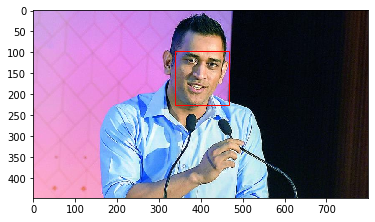

In [18]:
# Let us pass our input image to the function that we created above.
detect_the_faces('Pictures/dhoni.jpeg')

Till now, We created a function for detecting the faces in the image which is passed to the function. 

So from here we are going to work on Face Recognition process. 

## Face Recognition

Here in face recognition process, it itself has some steps. 
1. Locate and Extract Faces

We completed this step above.


2. Represent face as features

Now, to recognize the faces we have to represent the faces with unique features, we will call it as encodigs. Here to save our time we will use already trained encoder which will encode the each faces uniquely. So if two faces are same then the encodings of those faces has minimum euclidean distance. So calculating the distance between two faces we can say those faces are of same persone or not.
3. Compare with known faces

We have to first create a database for known faces, so we will compare the test image with our known image. 
4. Compute Euclidean distance and Apply Threshold

We will calculate the Euclidean distance between every known face and the test face. Then we will apply the threshould on it. If euclidean distance for any known face is less than the threshould then that test face is similar to the perticual known face so we can recognize it.


In [19]:
# We will use python dictionary as Database for known faces encodings
known_faces = {}

#Now we create a function to add the faces encoding into the data base.
def add_face(image_path, name):
    image = cv2.imread(image_path) # Read the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert BGR to RGB format
    
    # We will get a face encoding for the face in the image
    face_encoding = face_recognition.face_encodings(image)[0] # 0 because if there are more than one facec then it will take first detected face
    
    # We add the face encoding in thedatabase with corresponding names 
    known_faces[name] = face_encoding
    

    
    

In [20]:
# Let's add known faces in database, For now we will add 3 known faces
add_face('Pictures/dhoni.jpeg', 'Dhoni')
add_face('Pictures/hrithik.jpeg', 'Hrithik')
add_face('Pictures/Rohit.jpg', 'Rohit')

#Let's check total keys in database
print(list(known_faces.keys()))

['Dhoni', 'Hrithik', 'Rohit']


So pur database is ready with the persone names and there face encoding.

Now we will need a test image to check the difference between the encodings of the known faces and test face. If it matches then we will try to recognize it.

Now we create a function which can be used to recognize the faces in the image. for that we just need to pass path of test image.

In [21]:
from scipy.spatial import distance # This will be used for calculating the distance between two encodings

def recognize_face(image_path):
    # Let's read the image using cv2
    unknown_image = cv2.imread(image_path)
    unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB) # Convert thr BGR to RGB format
    
    # Let's get encodings for the face in the image
    unknown_face_encodings = face_recognition.face_encodings(unknown_image) # Here we will not add [0] because we want all the faces to be recognized in the image.
    
    # Now we will check the euclidean distance between two faces
    found_faces=[]
    threshold = 0.6
    for unknown_face_encoding in unknown_face_encodings:
        for known_person in known_faces:
            # Calculate the Euclidean distance
            d = distance.euclidean(known_faces[known_person], unknown_face_encoding)
            # We will check that distance should be less than threshold
            if d <= threshold:
                found_faces.append(known_person)
    if len(found_faces) ==  0:
        found_faces.append('Unknown')
    
    return found_faces # We return a list on found images in the image
    
        
    

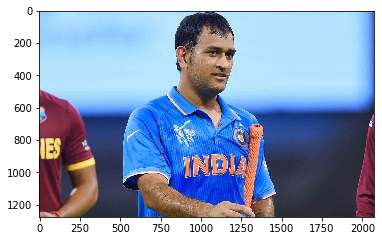

In [22]:
# Now Let's showcase our test image that we are going to recognize

test_image_path = 'Pictures/dhoni_test.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)

In [23]:
# Now Let's use above function that we created for recognition of person
# our function returns a list of found faces in the image

################### TEST NO 1

faces_in_picture = recognize_face('Pictures/dhoni_test.jpg')
for face in faces_in_picture:
    print("There is {}'s face in image".format(face))

There is Dhoni's face in image


In [24]:
################### TEST NO 2

faces_in_picture = recognize_face('Pictures/rohit_test.jpg')
for face in faces_in_picture:
    print("There is {}'s face in image".format(face))

There is Rohit's face in image


In [25]:
################### TEST NO 3

faces_in_picture = recognize_face('Pictures/hrithik_test.jpg')
for face in faces_in_picture:
    print("There is {}'s face in image".format(face))

There is Hrithik's face in image


In [26]:
################### TEST NO 4

faces_in_picture = recognize_face('Pictures/Aftab.jpg')
for face in faces_in_picture:
    print("There is {}'s face in image".format(face))

There is Unknown's face in image


In [27]:
################### TEST NO 5

faces_in_picture = recognize_face('Pictures/rohit_dhoni_test.jpg')
for face in faces_in_picture:
    print("There is {}'s face in image".format(face))

There is Dhoni's face in image
There is Rohit's face in image


## Conclusion
We started with the extracting the features from the image so that it will be easy to train model. Then we used pre-trained model to detect the faces in the picture. and lastly we encoded the faces in the picture and calculated the euclidean distace between known faces and the test faces. If the calculated distance is less than threshold then it's a match for corrosponding known face. 

We created some useful function which can help us to capsulize our code, for better understanding and scalability, such as detect_the_face(image_path), and recognize_face(image_path).